# Exploring the normal distribution equation and its behaviour when $\sigma \rightarrow 0$

Definition of the normal distribution

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \text{exp}\left[-\frac{1}{2}\left({\frac{x-\mu}{\sigma}}\right)^{2}\right]$$

Definition of the Dirac delta function
$$
\delta(x) = \begin{cases}
   \infty &\text{, } x=0 \\
   0 &\text{, } x\neq0
\end{cases}
\ \ \ \ \ \ \ \ \int_{-\infty}^{\infty} \delta(x) dx = 1
$$


Study of the normal distribution

In [1]:
f(σ, μ, x) = 1 / (σ * √(2π)) * exp((-1 / 2) * ((x - μ) / σ)^2);

In [2]:
using Plots;
gr();
using LaTeXStrings;

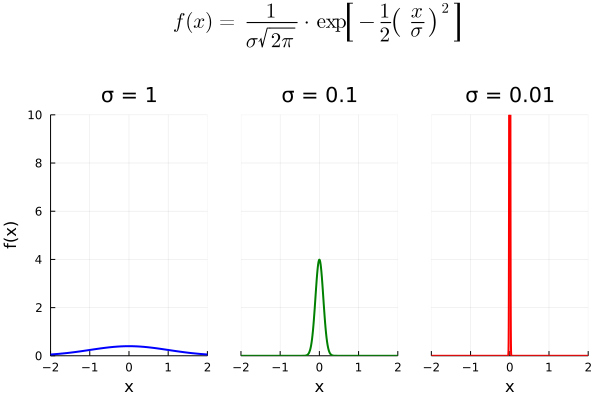

In [3]:
title = plot(title=L"f(x) = \frac{1}{\sigma\sqrt{2 \pi}} \cdot \textrm{exp}\left[-\frac{1}{2}\left({\frac{x}{\sigma}}\right)^{2}\right]", grid=false, ticks=false, axis=false)

p1 = plot(x -> f(1, 0, x), -2, 2, xlims=(-2, 2), ylims=(0, 10), legend=false, linewidth=2, xlabel="x", ylabel="f(x)", title="σ = 1", color=:blue)
p2 = plot(x -> f(0.1, 0, x), -2, 2, xlims=(-2, 2), ylims=(0, 10), legend=false, linewidth=2, xlabel="x", yaxis=false, yformatter=_ -> "", title="σ = 0.1", color=:green)
p3 = plot(x -> f(0.01, 0, x), -2, 2, xlims=(-2, 2), ylims=(0, 10), legend=false, linewidth=2, xlabel="x", yaxis=false, yformatter=_ -> "", title="σ = 0.01", color=:red)
curve_plots = plot(p1, p2, p3, layout=(1, 3))

plot(title, curve_plots, layout=grid(2, 1, heights=[0.1, 0.9]))

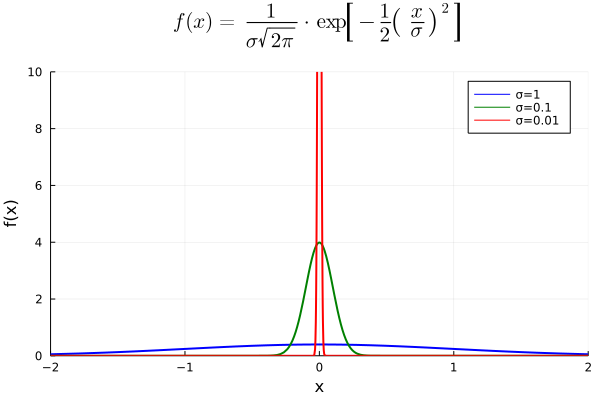

In [4]:
p1 = plot(x -> f(1, 0, x),
    color=:blue,
    -2, 2,
    xlims=(-2, 2),
    ylims=(0, 10),
    linewidth=2,
    label="σ=1",
    xlabel="x",
    ylabel="f(x)")

plot!(x -> f(0.1, 0, x),
    -2, 2,
    color=:green,
    linewidth=2,
    label="σ=0.1",)

plot!(x -> f(0.01, 0, x),
    -2, 2,
    color=:red,
    linewidth=2,
    label="σ=0.01")

plot(title, p1, layout=grid(2, 1, heights=[0.01, 0.99]))

Animating the normal distribution

In [5]:
Rectangle(w, h, x, y) = Shape([0, w, w, 0] .+ x, [0, 0, h, h] .+ y);

In [6]:
function makeNormalFrameSequence(σ_list)
    anim = Animation()

    plt_list = []

    for σ in σ_list
        plt = plot(x -> f(σ, 0, x), -2, 2, xlims=(-2, 2), ylims=(0, 10), legend=false, linewidth=2, xlabel="x", ylabel="f(x)")

        plot!(plt, Rectangle(0.5, 0.2, 1, 3), color=RGB(1, 1, 1))
        annotate!(1, 2.8, text("0", :black, :center, 10))
        annotate!(1.5, 2.8, text("1", :black, :center, 10))
        annotate!(1.25, 3.5, text("σ", :black, :center, 10))
        annotate!(1.25, 5, text(L"f(x) = \frac{1}{\sigma\sqrt{2 \pi}} \cdot \textrm{exp}\left[-\frac{1}{2}\left({\frac{x}{\sigma}}\right)^{2}\right]", :black, :center, 10))

        plot!(plt, Rectangle(σ / 2, 0.2, 1, 3), color=:blue)

        push!(plt_list, plt)
    end

    for plt in plt_list
        frame(anim, plt)
    end

    for plt in reverse(plt_list)
        frame(anim, plt)
    end

    return anim
end;

In [7]:
function makeGIF(range)
    gif(makeNormalFrameSequence(range),
        # "normal_dist.gif",
        fps=20,
        show_msg=false)
end;

Result

Plots.AnimatedGif("/tmp/jl_rIOGAj.gif")
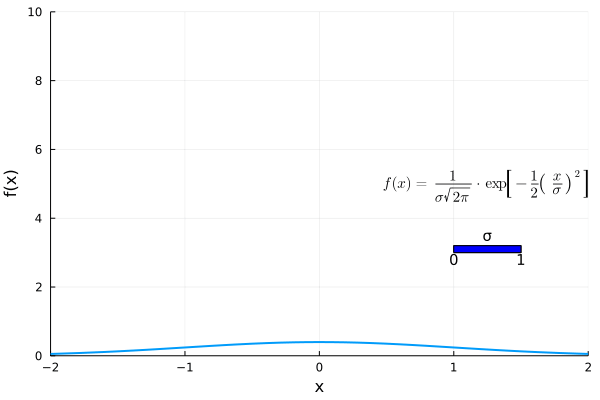

In [8]:
makeGIF(range(1, 0.01, length=50))


We obtain the Dirac delta function when $\sigma \rightarrow 0$